In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import ImageDatageneratorLibrary

from keras.preprocessing.image import ImageDataGenerator
import numpy as np #numerical analysis 
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.callbacks import ReduceLROnPlateau
#Dense layer is regularly deeply connected neural network layer
#MaxPooling2D to downsample the image
from keras.layers import Conv2D, Dropout, Dense, Flatten, MaxPooling2D, SeparableConv2D, Activation, BatchNormalization
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array 

In [3]:
#configure ImageDatGenerator Class 
#Define the parameters/arguments for ImageDataGenerator class
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 width_shift_range=0.2,
                                height_shift_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
#Applying ImageDataGenerator functionality to train data 

x_train =train_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/train_set",
                                           target_size = (64,64),
                                           batch_size=5,
                                           color_mode='rgb',
                                           class_mode='categorical')

Found 742 images belonging to 4 classes.


In [5]:
#Applying ImageDataGenerator functionality to test data 

x_test =test_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/test_set",
                                         target_size = (64,64), 
                                         batch_size=5,color_mode='rgb',
                                         class_mode='categorical')

Found 198 images belonging to 4 classes.


In [6]:
#initializing the model
model=Sequential()

#add convolutional, maxpooling and flatten layers
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#add Dense Layer 
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=4,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [8]:
#configure the learning process
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [9]:
x_test.class_indices

{'Cyclone': 0, 'Earthquake': 1, 'Flood': 2, 'Wildfire': 3}

In [10]:
#Training the model
history = model.fit(x_train,epochs=20,
                    steps_per_epoch=len(x_train),
                    validation_data=x_test,validation_steps=len(x_test))

Epoch 1/20
149/149 [==============================] - 270s 2s/step - loss: 1.2815 - accuracy: 0.3706 - val_loss: 1.1783 - val_accuracy: 0.4040
Epoch 2/20
149/149 [==============================] - 42s 281ms/step - loss: 1.1604 - accuracy: 0.4582 - val_loss: 1.0726 - val_accuracy: 0.5101
Epoch 3/20
149/149 [==============================] - 48s 324ms/step - loss: 0.9874 - accuracy: 0.5876 - val_loss: 0.9062 - val_accuracy: 0.5808
Epoch 4/20
149/149 [==============================] - 45s 301ms/step - loss: 0.8932 - accuracy: 0.6226 - val_loss: 0.8050 - val_accuracy: 0.6970
Epoch 5/20
149/149 [==============================] - 43s 291ms/step - loss: 0.8784 - accuracy: 0.6496 - val_loss: 0.9248 - val_accuracy: 0.5808
Epoch 6/20
149/149 [==============================] - 42s 284ms/step - loss: 0.8306 - accuracy: 0.6806 - val_loss: 0.6897 - val_accuracy: 0.7323
Epoch 7/20
149/149 [==============================] - 42s 283ms/step - loss: 0.7764 - accuracy: 0.6739 - val_loss: 0.8975 - val_accu

In [12]:
#save the model
model.save('disaster.h5')
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)

In [13]:

#load the saved model
model = load_model("disaster.h5")

In [14]:
#load image
img=load_img(r"/content/drive/MyDrive/dataset/test_set/Earthquake/1321.jpg",target_size=(64,64))
x=img_to_array(img)
x=np.expand_dims(x,axis=0)
index=['Cyclone','Earthquake','Flood','Wildfire']

#predict class 
y=np.argmax(model.predict(x),axis=1)
print(index[int(y)])

1/1 [==============================] - 0s 136ms/step
Earthquake


In [15]:
#load image
img=load_img(r"/content/drive/MyDrive/dataset/test_set/Cyclone/921.jpg",target_size=(64,64))
x=img_to_array(img)
x=np.expand_dims(x,axis=0)
index=['Cyclone','Earthquake','Flood','Wildfire']

#predict class 
y=np.argmax(model.predict(x),axis=1)
print(index[int(y)])

1/1 [==============================] - 0s 24ms/step
Cyclone


Text(0.5, 1.0, 'Training and validation loss')

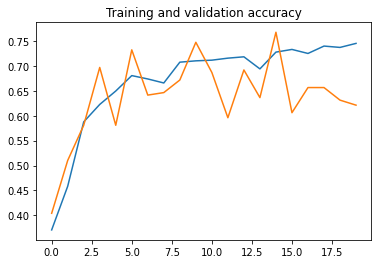

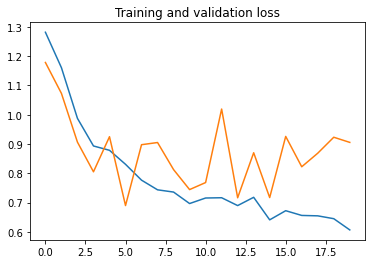

In [24]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')